# Folgen

## Inhalt
* [Reelle Zahlenfolge](#Reelle-Zahlenfolge)
* [Rekursive Folgen](#Rekursive-Folgen)
* [Ein Beispiel: das Collatz-Problem](#Ein-Beispiel:-Das-Collatz-Problem)

### Reelle Zahlenfolge

Abbildung $a:\mathbb{N} \ \rightarrow \ \mathbb{R}$.  

Alternative Notation: $(a_n)_{n \in \mathbb{N}}$ oder $(a_n)_{n}$.                      
* Glieder der Folge: Die Zahlen $a_n$.                                      
* Teilfolge: $(a_{n_i})_{n_i}$ ist eine Abbildung $a:N \ \rightarrow \ \mathbb{R}$, wobei $N \subset \mathbb{N}$ eine Menge mit                        
unendlich vielen Elementen ist.                                                               


#### Konvergenz von Folgen
Eine Zahlenfolge $(a_n)_n$ ist konvergent gegen den *Grenzwert* oder *Limes* $a\in \mathbb{R}$, wenn es zu jedem                       
$\varepsilon >0$ ein $n_0 \in \mathbb{N}$ gibt, so dass für alle $n \geq                      
n_0$ die Abschätzung                                                                          
$$ |a_n - a|< \varepsilon$$
 gilt. Man schreibt                                                                           
$$ a=\lim_{n \rightarrow \infty} a_n. $$
                                                                                              
*divergent*: nicht konvergente Folge. 


**Konvergenzkriterien**                                                                         

- Jede monotone, beschränkte Folge konvergiert.               
- Konvergenz bei Addition: Sind $(a_n)_n$ und $(b_n)_n$ konver
gente Folgen, $\alpha, \beta \in \mathbb{R}$, so ist auch die Folge $( \alpha a_n+\beta b_n)_n$ konvergent mit dem Grenzwert                                  
 $$ \lim_{n \rightarrow \infty} ( \alpha a_n + \beta b_n)= \alpha 
                   \lim_{n \rightarrow \infty} a_n + \beta \lim_{n
                   \rightarrow \infty} b_n .$$                    
- Konvergenz bei Multiplikation: Sind $(a_n)_n$ und $(b_n)_n$ 
konvergente Folgen, so ist auch die Folge $(a_n b_n)_n$ konvergent mit dem Grenzwert                                  
$$                                                               
  \lim_{n \rightarrow \infty} ( a_n b_n)=                         
                   (\lim_{n \rightarrow \infty} a_n) \cdot  (\lim_
{n                                                                
                   \rightarrow \infty} b_n).                      
$$                                                               
- Bemerkung: Weglassen oder Hinzufügen endlich vieler Glieder 
verändert das Konvergenzverhalten nicht.       

**Grenzwerte von Folgen**

``` python
limit(expr(x), x = <stelle>, dir='<direction>')
```

mit Ausdruck expr(x)  

* <stelle&gt;: Wert oder oo f&uuml;r $\infty$, -oo f&uuml;r $-\infty$
* <direction&gt;: + von positiv kommend, - von negativ kommend

Beispiel: $a_n:= \frac{1}{n+1} \Rightarrow 1, \frac{1}{2}, \frac{1}{3}, \frac{1}{4}, \ldots$ (konvergent)  

In [1]:
var('n')
limit(1/(n+1),n=oo)

0

Beispiel: $d_n:=\left( \frac{n+2}{n+1} \right)^{n+1} \Rightarrow \frac{2^1}{1^1},\frac{3^2}{2^2}, \frac{4^3}{3^3},...$ (konvergent)  

In [1]:
limit(((n+2)/(n+1))^(n+1),n=oo)

e

$e_n:=(-1)^n \Rightarrow 1,-1,1,-1,...$ (divergent)

Sage nennt es <em>indefinite</em> (kurz: <strong>ind</strong>; undefiniert aber beschr&auml;nkt)  

In [1]:
limit((-1)^n,n=oo)

ind

$c_n:=2^n \Rightarrow 1,2,4,8,\ldots$ (divergent) 

In [1]:
limit(2^n,n=oo)

+Infinity

$b_n:= 2^{-n} \Rightarrow 1,\frac{1}{2}, \frac{1}{4}, \frac{1}{8}, \ldots$ (konvergent)  

In [1]:
limit(2^(-n),n=oo)

0

In [1]:
limit(x*sin(1/x), x=0)

0

Folgen k&ouml;nnen  z.B. durch <em>points</em> visualisiert werden  

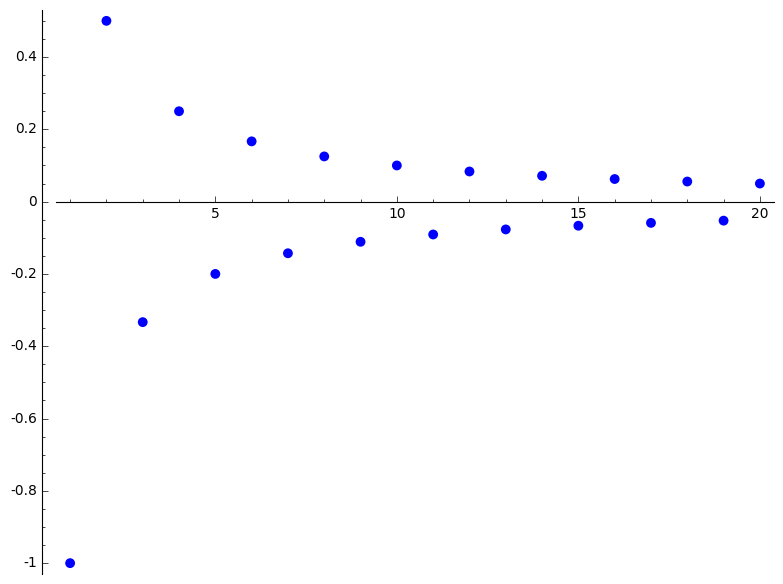

In [1]:
reset()
point([(n,(-1)^n/n) for n in range(1,21)],pointsize=50)

### Rekursive Folgen
Rekursive Funktionen nutzen:

Beispiel: $$y_{n+2}:=2y_{n+1}-y_n+2, \quad y_0=-1, y_1=a. $$

In [1]:
reset()
def y(n):
    if n==0:
        return -1
    if n==1:
        var('a')
        return a
    return 2*y(n-1)-y(n-2)+2
y(4)

4*a + 15

Mit Ausgabe der Rekursions-Schritte  

In [1]:
def yOut(n,depth=0):
    print (depth*"  "  + "call " + str(n))
    if n==0:
        print (depth*"  " +"return: " + str(-1))
        return -1
    if n==1:
        print (depth*"  " +"return: " + str(a))
        return a
    yn1 = yOut(n-1,depth+1)
    yn2 = yOut(n-2,depth+1)
    print (depth*"  " +"return: " + str(2*yn1-yn2+2))
    return 2*yn1-yn2+2
print yOut(3)

call 3
  call 2
    call 1
    return: a
    call 0
    return: -1
  return: 2*a + 3
  call 1
  return: a
return: 3*a + 8
3*a + 8


Iterativ  

In [1]:
def yIt(n):
    var('a')
    yn1 = a
    yn2 = -1
    if n == 1: return yn1
    if n == 2: return yn2
    for idx in range(2,n+1):
        yn = (2*yn1-yn2+2)
        yn2 = yn1
        yn1 = yn
    return yn
print yIt(4)

4*a + 15


Zeitvergleich. Hier wird deutlich was f&uuml;r einen Unterschied eine rekursive Implementation zu einer iterativen macht.  

In [1]:
timeit('yIt(20)')

625 loops, best of 3: 430 µs per loop


In [1]:
timeit('y(20)')

5 loops, best of 3: 469 ms per loop


### Beispiel: Das Collatz Problem

Sei $x_0\in \mathbb{N}$. Dann definiert man die folgende Folge
$$x_n:= \left \{ \begin{array}{ll} x_{n-1}/2, & \mbox{falls } x_{n-1} \mbox{ gerade ist} \\ 3x_{n-1}+1 & \mbox{falls } x_{n-1} \mbox{ ungerade ist} \end{array} \right. . $$
Man kann zeigen, dass f&uuml;r alle Startwerte ein $N_0$ existiert mit $x_{N_0}=1$.  

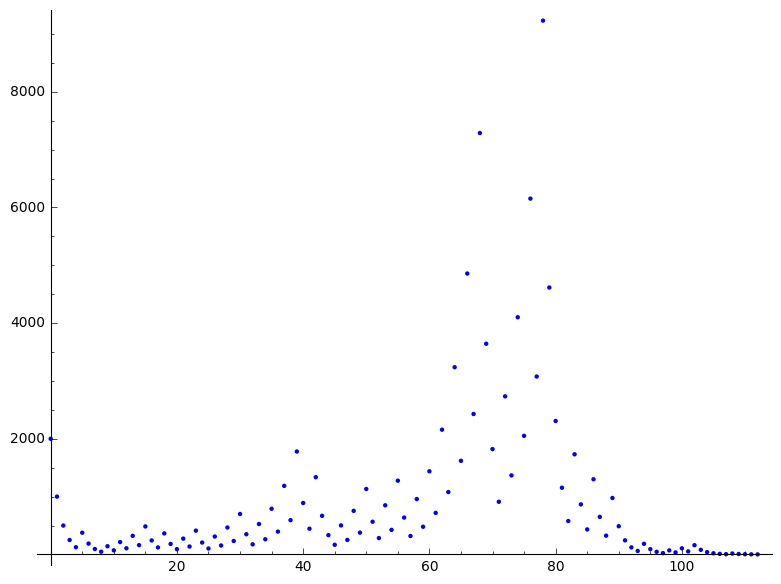

In [1]:
def collatz(n):
    """ Collatz problem """
    sequence = [n]
    while sequence[-1] > 1:
        if sequence[-1] % 2 == 0:
            sequence.append(sequence[-1]/2)
        else:
            sequence.append(3*sequence[-1]+1)
    return sequence

seq = collatz(2000)
Objekt = point([(i,val) for i,val in enumerate(seq) ]) 
Objekt.show()